In [1]:
#Import the necessary Libraries
import numpy as np 
import pandas as pd


# Data Preparation

In [2]:
# Load data
csv_file_path = "../data/raw/data.csv"
df = pd.read_csv(csv_file_path)

In [3]:
# Dataframe size
len(df)

11914

In [4]:
df.shape

(11914, 16)

In [5]:
#Inspect the first few rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


The data offers useful features such as as car: model, make, year and other variables we can use to predict the price(MSRP).
The features naming convention is inconsistent. There are some with spaces others with underscores. As well as name and lowercase. In the next code we solve that by replacing spaces with underscores and making all names lowecase.

In [6]:
# Clean column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "-")

In [7]:
df.head()

,make,model,year,engine-fuel-type,engine-hp,engine-cylinders,transmission-type,driven_wheels,number-of-doors,market-category,vehicle-size,vehicle-style,highway-mpg,city-mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


The strings in the dataset also seem inconsistent so we will standardise that as well.
We first figure out the features that are of object data type by  running df.dtypes
Run df.dtypes[df.dtypes == 'object].index to output the features with object data type and store that in a variable called strings as a list.
Loop over the columns in the string to convert to lower case and replace spaces. Overwite the innitial df with the new values.

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine-fuel-type      object
engine-hp            float64
engine-cylinders     float64
transmission-type     object
driven_wheels         object
number-of-doors      float64
market-category       object
vehicle-size          object
vehicle-style         object
highway-mpg            int64
city-mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
strings = list(df.dtypes[df.dtypes ==  'object'].index)
strings

['make',
 'model',
 'engine-fuel-type',
 'transmission-type',
 'driven_wheels',
 'market-category',
 'vehicle-size',
 'vehicle-style']

In [10]:
# Standardize strings in object columns

for col in strings:

    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.head()

,make,model,year,engine-fuel-type,engine-hp,engine-cylinders,transmission-type,driven_wheels,number-of-doors,market-category,vehicle-size,vehicle-style,highway-mpg,city-mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an essential step in the data analysis process that involves exploring and understanding the characteristics and patterns of the dataset. The primary goal of EDA is to gain insights into the data, identify trends, anomalies, and relationships between variables, and inform subsequent steps in the analysis.

In this section, we perform exploratory data analysis on the car dataset to gain a deeper understanding of its features and distributions. We iterate over each column in the dataset and examine unique values to identify the type of data and the number of unique values present. This initial exploration helps us identify potential issues such as missing values, inconsistent data formats, and outliers.

By visualizing the distribution of the target variable (car prices) using histograms, we can gain insights into how prices are spread across the dataset. Understanding the distribution of prices is crucial for selecting appropriate modeling techniques and evaluating model performance.




In [12]:
# Loop over each column to understand data types and unique values

for col in df.columns:

    print(col)

    print(df[col].unique()[:5])

    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine-fuel-type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine-hp
[335. 300. 230. 320. 172.]
356
engine-cylinders
[ 6.  4.  5.  8. 12.]
9
transmission-type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number-of-doors
[ 2.  4.  3. nan]
3
market-category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle-size
['compact' 'midsize' 'large']
3
vehicle-style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway-mpg
[26 28 27 25 24]
59
city-mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


## Distribution of Price
Helps us:
1. Understanding Data Spread: It reveals how prices are distributed, guiding model selection and performance evaluation. Though for our case, we are using linear regression model.
2. Outlier Detection: Helps identify anomalies that might skew predictions, aiding in data cleaning.
3. Feature Engineering Insights: Distribution insights can inform transformations to improve model performance.
4. Model Assumptions: Ensures model assumptions, like normal distribution(As in linear regression model), align with data reality.
5. Evaluation Interpretation: Assists in interpreting model performance metrics against actual price distribution.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#ensures plots are displayed within a notebook.
%matplotlib inline  

c:\Users\Zeetracker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

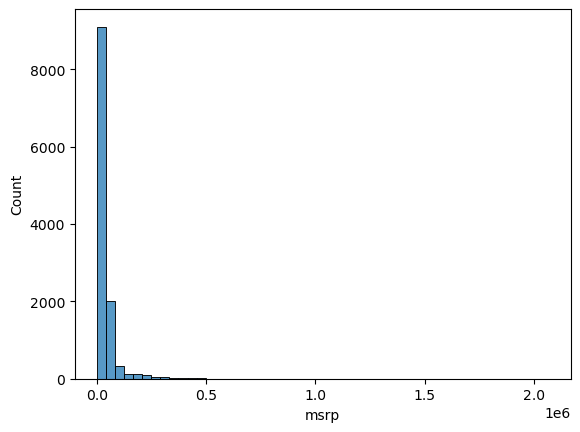

In [14]:
#Display a histogram with the prices in intervals of 50 bins.
sns.histplot(df.msrp, bins=50)

The histogram above plots the distribution of the car's prices in the dataset.

**Obsevations**

Majority of car prices are concentrated within a range of 100,000 to 500000.

There is a notable deviation in the distribution towards higher prices. Beyond the 500,000 mark, there is a long tail of car prices, indicating that a few cars have significantly higher prices compared to the majority.

We can increase the granularity by displaying the histogram of prices less than 1000000 ignoring the tail for further analysis.

c:\Users\Zeetracker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

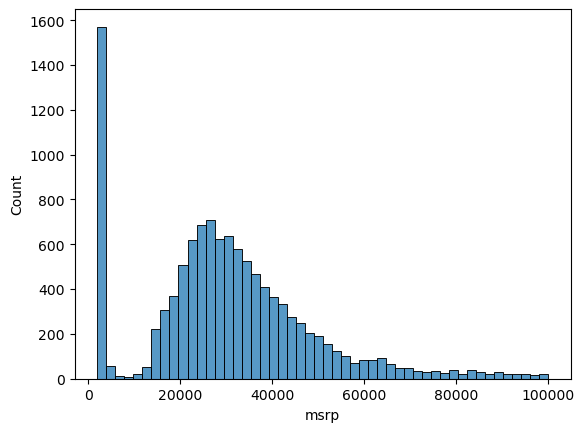

In [15]:
#Display histogram of prices  less than 100,000
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

To address the long tail distribution issues(Skewness) in the data, We will employ logarithmic transformation. In order to compress the long tail and spread out the densley populated region making it  more symmetrical.

N/B long tail distribution is not good for the machine learning model we are about to use.

In [16]:
#Transform prices to logarithms and store the new values in a variable
price_logs = np.log1p(df.msrp)

In [17]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

c:\Users\Zeetracker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

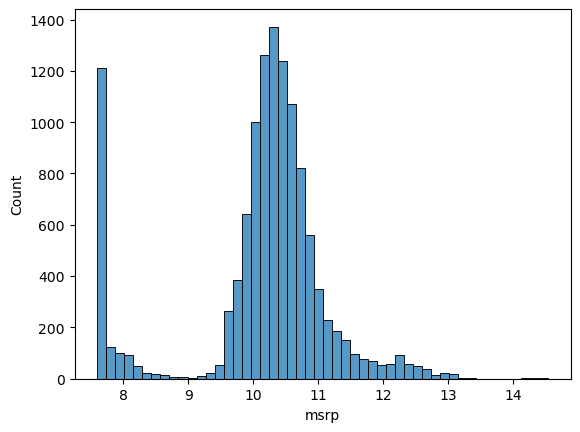

In [18]:
# Visualize the transformed data distribution
sns.histplot(price_logs, bins = 50)

What we have above is a normal distribution which is good for the model.

# Handle Missing Values
In order to handle potential errors improve model's performance
We will use scikit learn and Mean as our chosen imputation strategy



In [19]:
# Display number of missing values per column
df.isnull().sum()

make                    0
model                   0
year                    0
engine-fuel-type        3
engine-hp              69
engine-cylinders       30
transmission-type       0
driven_wheels           0
number-of-doors         6
market-category      3742
vehicle-size            0
vehicle-style           0
highway-mpg             0
city-mpg                0
popularity              0
msrp                    0
dtype: int64

In [20]:
# Use scikit-learn to impute missing values in the numeric data
from sklearn.impute import SimpleImputer

# Select numeric columns
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Create an instance of SimpleImputer with mean as the chosen strategy
imputer = SimpleImputer(strategy="mean")

# Fit the imputer to the numeric columns and transform them
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [21]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine-fuel-type        3
engine-hp               0
engine-cylinders        0
transmission-type       0
driven_wheels           0
number-of-doors         0
market-category      3742
vehicle-size            0
vehicle-style           0
highway-mpg             0
city-mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework
Split our data into 2 parts.
1. Training dataset - used to train the machine learning model.
3. Validation Dataset - The validation dataset is used to evaluate the final performance of the trained model on unseen data.


In [22]:
# Initialize a variable n that equals to the length of the data frame
n = len(df)

#split the dataframe
n_val = int(n * 0.2)
n_train = n  - n_val

#View the split figures
n_val, n_train

(2382, 9532)

We want to assign the split figures into new data frames.
We'll use the .iloc[]  pandas method. A method used to access and manipulate data in  dataframe based on its integer position(Index).
Also, we will shuffle the rows so that the data is randomly distributed accross the split sets to minimize biasness that may arise from the ordering of the data.

In [23]:
#Generate an array idx containing numbers from 0 - n
idx = np.arange(n)
# Set the random generator seed to make the number generator same everytime the code runs(Reproducable)
np.random.seed(2)
#randomly shuffle the elements of idx
np.random.shuffle(idx)

In [24]:


# Select the first n_train indices for training data
df_train = df.iloc[idx[:n_train]]

# Select the remaining indices for validation data
df_val = df.iloc[idx[n_train:]]

In [25]:
#Output the split training data
df_train

,make,model,year,engine-fuel-type,engine-hp,engine-cylinders,transmission-type,driven_wheels,number-of-doors,market-category,vehicle-size,vehicle-style,highway-mpg,city-mpg,popularity,msrp
2735,chevrolet,cobalt,2008.0,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33.0,24.0,1385.0,14410.0
6720,toyota,matrix,2012.0,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32.0,25.0,2031.0,19685.0
5878,subaru,impreza,2016.0,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37.0,28.0,640.0,19795.0
11190,volkswagen,vanagon,1991.0,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18.0,16.0,873.0,2000.0
4554,ford,f-150,2017.0,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21.0,15.0,5657.0,56260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015.0,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37.0,25.0,870.0,35750.0
5549,maserati,granturismo_convertible,2015.0,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20.0,13.0,238.0,145740.0
4146,cadillac,escalade_hybrid,2013.0,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23.0,20.0,1624.0,74425.0
6337,mitsubishi,lancer,2016.0,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34.0,24.0,436.0,17595.0


In [26]:
#verify the lenth of the split data
len(df_train), len(df_val)

(9532, 2382)

In [27]:
#Reset dataset index  and  drop the previous indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [28]:
df_train

,make,model,year,engine-fuel-type,engine-hp,engine-cylinders,transmission-type,driven_wheels,number-of-doors,market-category,vehicle-size,vehicle-style,highway-mpg,city-mpg,popularity,msrp
0,chevrolet,cobalt,2008.0,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33.0,24.0,1385.0,14410.0
1,toyota,matrix,2012.0,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32.0,25.0,2031.0,19685.0
2,subaru,impreza,2016.0,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37.0,28.0,640.0,19795.0
3,volkswagen,vanagon,1991.0,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18.0,16.0,873.0,2000.0
4,ford,f-150,2017.0,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21.0,15.0,5657.0,56260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015.0,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37.0,25.0,870.0,35750.0
9528,maserati,granturismo_convertible,2015.0,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20.0,13.0,238.0,145740.0
9529,cadillac,escalade_hybrid,2013.0,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23.0,20.0,1624.0,74425.0
9530,mitsubishi,lancer,2016.0,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34.0,24.0,436.0,17595.0


In [29]:
# Perform logarithmic transformation on the target variable for the training, valuation and test dataset
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [30]:
# delete the target variable from the dataset to avoid accidentally using it as a feature
del df_train['msrp']
del df_val["msrp"]

## Training the linear regression model
Linear regression is a fundamental statistical technique used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). It assumes a linear relationship between the predictor(s) and the target variable.

The linear regression model is represented by the equation:

**y = w0 + w1x1 + w2x2 +w3x3.....wnxn**

Where:

- y is the dependent variable (target).

- x1, x2, x3,...,xn are the independent variables (predictors).

- w0 is the intercept term.

- w1,w2,w3,....,wn are the coefficients (parameters) that represent the change in the target variable for a unit change in the corresponding predictor.

- ε is the error term, representing the discrepancy between the observed and predicted values.

The goal of linear regression is to estimate the coefficients 
that minimize the sum of squared residuals (errors) between the observed and predicted values. This process is typically done using the method of least squares.

### Applying Linear Regression to the Car Prediction Model

We already established that MSRP is the target variable AKA (y)
w0 is the baseline, the y intercept in simpler terms, its the value of y when x is 0. For our case, the price of a car when there are no predictors AKA features influencing the price.
x are our features.. and since Linear regression is for solving numeric problems in ML models, we will use just the numeric features to train this model(run code "df_train.dtypes") The features are: engine-fuel-type
engine-hp, engine-cylinders, number-of-doors, highway-mpg ,city-mpg ,popularity

for our model:
**g(X) = Xw ≈ y** To mean feeding our model g with features x should be able to predic the y.   

X represents all our features in this case.

so Xw ≈ y

we multiply both sides by X tranpose(We're trying to get to an Identity matrix so that we can find an equation for finding w. NB: If our X was a square matrix, multiplying by its inverse would be ennough, but in our case there are definetely more rows  than columns so we'll work with the Transpose that will help us find the parametres that minizes the sum f squared errors between predicted values and actual values of the target variable)

XTXw = XTy

We further break down the equation by multiplying XTX by its inverse to get an identity matrix ( a square matrix whose diagonal elements are +1 and all other elements = 0, you multiply it by another matrix it leaves the matrix unchanged)

(XTX)-1 *XTXw = (XTX)-1*XTy NB* -1 denotes inverse and whatever you do on the left side also do to the right side of the equation.

You multiply a number by its inverse the result is 1 which leaves us with w on the left side

so we have:
**w = (XTX)-1*XTy** and  This is our equation.

This equation gives us the values of w that minimize the sum of squared errors between the predicted and actual values of 
y.
 
Now, let's write code to train the model using linear regression.


In [31]:
# Funtion to train the model
def train_linear_regression(X, y):
    #Find X transpose and use dot() funtion to multiply it to X
    XTX = X.T.dot(X)
    #Find the inverse of XTX
    XTX_inv = np.linalg.inv(XTX)
    #Find the list of weights w
    w_full = XTX_inv.dot(X.T).dot(y)
    #Return w0 and the rest of the weights as a tuple
    return w_full[0], w_full[1:]

In [32]:
# Get the numeric features for training the model
base = ["engine-hp", "engine-cylinders", "highway-mpg", "city-mpg", "popularity"]
X_train = df_train[base].values
# Add a column of ones for the intercept term
X_train = np.column_stack([np.ones((X_train.shape[0], 1)), X_train])
# Train the linear regression model
w0, w = train_linear_regression(X_train, y_train)

# Calculate the predicted values
y_pred = X_train.dot(np.hstack([w0, w]))

c:\Users\Zeetracker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Zeetracker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

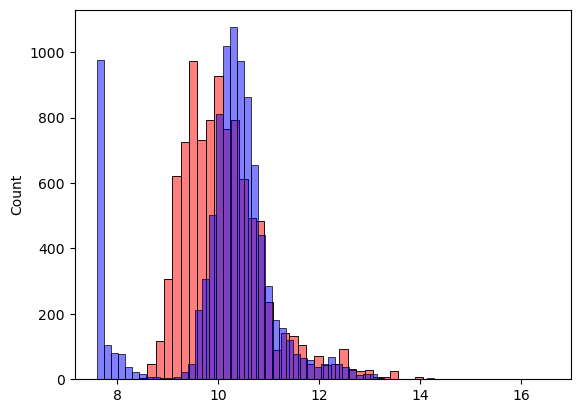

In [33]:
#Plot the predicted values alongside the original data 
#This is done to visualize the models predictions compared to the actual target values
sns.histplot(y_pred, color ='red', alpha= 0.5, bins=50)
sns.histplot(y_train, color ='blue', alpha=0.5, bins=50)


The histogram plot generated above visualizes the differences between the model's predictions and the actual target values.

**Observations**

- The model has a symetrical distribution, however it ignores the first values

- The curve in the histogram is consistently lower than the target. This indicates that the model tends to underestimate the target variable across the dataset.

This systematic bias towards underestimation suggests a need for further investigation into the factors contributing to this.

We will use the Root mean squared error(RMSE)metric to quantify the extent of the model's error.

**Important Assumption: Model is unfit for use*


## Root Mean Squared Error

We will evaluate the model's performance using RMSE metrics.

We do this to quantify the extent of our model's unfitness

Calculated as the squareroot f the mean of the squared difference between predicted and actual values.

*N/B A lower RMSE is better than a higher one and RSME is sensitive to outliers*


In [34]:
def rmse(y, y_pred):
    se = (y-y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [35]:
rmse(y_train, y_pred)

0.7553875745654345

The model is off by 75%

## Validating the model
We further validate the model by using the validation data

In [36]:

base = ["engine-hp", "engine-cylinders", "highway-mpg", "city-mpg", "popularity"]
X_val = df_val[base].values
# Add a column of ones for the intercept term
X_val = np.column_stack([np.ones((X_val.shape[0], 1)), X_val])
# Train the linear regression model
w0, w = train_linear_regression(X_val, y_val)

# Calculate the predicted values
y_pred = X_val.dot(np.hstack([w0, w]))

rmse(y_val, y_pred)

0.7265347646126024

Given that the model performs poorly on both the training and validation datasets (with RMSE values of 75% and 72% respectively), it suggests that the model is likely underfitting. Underfitting occurs when the model is too simple to capture the underlying patterns and relationships in the data, resulting in poor performance on both the training and validation/test datasets.

One possible reason for underfitting could be that the model fails to adequately capture the complexities of the relationship between car prices and the features used for prediction. In our case, it appears that not only numerical features but also categorical features such as the model of the car, its age, driven wheel, etc., might influence car prices. Therefore, it's essential to incorporate these categorical features into the modeling process.

This observation leads us to the next step, which is feature engineering. Feature engineering involves transforming raw data into meaningful features that can improve model performance.




## Feature Engineering

Feature engineering is a crucial step in the machine learning pipeline where we create new features or transform existing ones to enhance the predictive power of our model. It involves extracting meaningful information from the raw data to better represent the underlying relationships and patterns.

We begin by creating a new feature called "age," which represents the age of the car. We calculate it by subtracting the manufacturing year of each car from the latest year in our dataset (2017). This new feature provides valuable information about the car's age, which could influence its price.

Our dataset contains several categorical variables such as car model, make, market category, transmission type, number of doors, vehicle size, vehicle style, and driven wheels.

To incorporate these categorical features into our model, we employ the target encoding technique. This process assigns numerical values to categories based on the target variable's mean or median, allowing us to represent categorical data in a numerical format suitable for machine learning algorithms.

We use target encoding to encode each categorical variable and add the encoded features to our feature set.


In [37]:
# Create a new feature age by subtracting the  year from the latest year(When dataset was collected)

2017 - df_train.year


0        9.0
1        5.0
2        1.0
3       26.0
4        0.0
        ... 
9527     2.0
9528     2.0
9529     4.0
9530     1.0
9531     2.0
Name: year, Length: 9532, dtype: float64

In [38]:
# Function for adding age onto the dataset
def prepare_X(df):
    df = df.copy()
    df["age"] = 2017 - df_train.year
    features = base + ['age']
    df_num = df[features]
    X = df_num.values
    return X

In [39]:
df_train.dtypes

make                  object
model                 object
year                 float64
engine-fuel-type      object
engine-hp            float64
engine-cylinders     float64
transmission-type     object
driven_wheels         object
number-of-doors      float64
market-category       object
vehicle-size          object
vehicle-style         object
highway-mpg          float64
city-mpg             float64
popularity           float64
dtype: object

In [40]:

X_train = prepare_X(df_train)
# Add a column of ones for the intercept term
X_train = np.column_stack([np.ones((X_train.shape[0], 1)), X_train])
# Train the linear regression model
w0, w = train_linear_regression(X_train, y_train)

# Calculate the predicted values
y_pred = X_train.dot(np.hstack([w0, w]))

rmse(y_train, y_pred)

0.5105229225595562

After incorporating the 'car_age' feature, the model's performance notably improved, with the Root Mean Squared Error (RMSE) decreasing to 51%. This enhancement suggests that considering the age of the car as a predictor variable has contributed to better capturing the underlying patterns in car prices.

We'll further improve the model by Incorporating more categorical features, But first We visualize the changes using a histogram plot.



c:\Users\Zeetracker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Zeetracker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

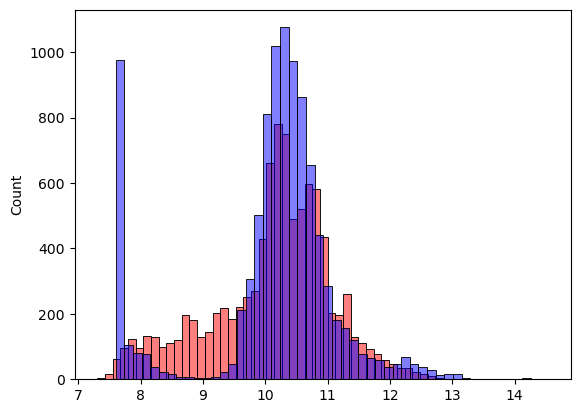

In [41]:
# Plot the predicted values alongside the original data
# This is done to visualize the models predictions compared to the actual target values
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

Feature engineering is an iterative process, and we continuously refine and enhance our features based on insights gained from exploratory data analysis and model evaluation.
In the next step we encode the car models and add that as a feature

In [42]:
# Function for preparing features with the  model encoded model
def prepare_X(df, encoder):
    df = df.copy()
    df["age"] = 2017 - df_train.year
    features = base + ['age']

    df["encoded_model"] = encoder.transform(df["model"])
    # Append the encoded model feature to the base features list
    features = features + ["encoded_model"]
    df_num = df[features]
    X = df_num.values
    return X

In [43]:
import category_encoders as ce

# Initializing a TargetEncoder object for the 'model' column
encoder = ce.TargetEncoder(cols=["model"])

# Fit the encoder on the training data
encoder.fit(df_train["model"], y_train)

TargetEncoder(cols=['model'])

In [44]:
X_train = prepare_X(df_train, encoder)
# Add a column of ones for the intercept term
X_train = np.column_stack([np.ones((X_train.shape[0], 1)), X_train])
# Train the linear regression model
w0, w = train_linear_regression(X_train, y_train)

# Calculate the predicted values
y_pred = X_train.dot(np.hstack([w0, w]))

rmse(y_train, y_pred)

0.4509851729927159

After including the car model as a predictor variable, the model's performance demonstrated improvement. The Root Mean Squared Error (RMSE) decreased from 51 to 45, signifying an enhancement in the model's predictive accuracy for car prices.

However, despite the improvement, the model's performance still indicates that it is not yet optimal. To address this, we will incorporate additional features to further enhance the model's predictive capability.


In [45]:

# Function for preparing features with the encoded make model

def prepare_X(df, encoder, make_encoder):
    df = df.copy()
    df["age"] = 2017 - df_train.year
    features = base + ["age"]

    df["encoded_model"] = encoder.transform(df["model"])
    # Append the encoded model feature to the base features list
    features = features + ["encoded_model"]
    df["encoded_make"] = make_encoder.transform(df["make"])
    new_features = features + ["encoded_make"]
    df_num = df[new_features]
    X = df_num.values
    return X

In [46]:
import category_encoders as ce

# Initializing a TargetEncoder object for the 'make' column
make_encoder = ce.TargetEncoder(cols=["make"])

# Fit the encoder on the training data
make_encoder.fit(df_train["make"], y_train)

TargetEncoder(cols=['make'])

In [47]:
# Check the mapping for the 'make' column
print(make_encoder.mapping)

{'make': make
 1      9.923043
 2     10.071960
 3      9.898225
 4     10.136085
 5      9.891467
 6     12.339147
 7     10.922195
 8     11.243373
 9     11.418711
 10     9.735415
 11    12.314918
 12    10.467419
 13     9.961741
 14     9.446147
 15    10.064204
 16     9.621839
 17     9.960265
 18    10.474587
 19    11.263708
 20    10.591047
 21    11.544051
 22    10.551948
 23     9.871809
 24     9.599631
 25    10.987833
 26     9.453678
 27     9.904359
 28     9.862170
 29    10.099542
 30    10.720587
 31    10.037174
 32    10.062154
 33    12.366901
 34     8.497262
 35    10.075455
 36     9.637519
 37    10.481705
 38     7.728187
 39    10.810666
 40     9.599934
 41    12.110914
 42    10.713491
 43    10.216147
 44    10.205382
 45    10.370112
 46    10.572671
 47    10.441371
 48    10.258244
-1     10.107251
-2     10.107251
dtype: float64}


In [48]:
X_train = prepare_X(df_train, encoder, make_encoder)
# Add a column of ones for the intercept term
X_train = np.column_stack([np.ones((X_train.shape[0], 1)), X_train])
# Train the linear regression model
w0, w = train_linear_regression(X_train, y_train)

# Calculate the predicted values
y_pred = X_train.dot(np.hstack([w0, w]))

rmse(y_train, y_pred)

0.42873752290429507

A decrease in RMSE to 42% is significant, But not good enough as the model is still not optimal.

We will consider the market category as a feature, but first we will fill the missing values as 'others' before encoding the feature.

In [49]:
# Fill missing values in the 'market-category' column with 'Other' category
df_train["market-category"] = df_train["market-category"].fillna("Other")

In [50]:
# Confirm that the values have been filled
df_train.isnull().sum()

make                 0
model                0
year                 0
engine-fuel-type     1
engine-hp            0
engine-cylinders     0
transmission-type    0
driven_wheels        0
number-of-doors      0
market-category      0
vehicle-size         0
vehicle-style        0
highway-mpg          0
city-mpg             0
popularity           0
dtype: int64

In [51]:
# Function for preparing features with the encoded models
def prepare_X(df, encoder, make_encoder, mkt_encoder):
    df = df.copy()
    df["age"] = 2017 - df_train.year
    features = base + ["age"]

    # Append the encoded model feature to the base features list
    df["encoded_model"] = encoder.transform(df["model"])
    features = features + ["encoded_model"]
    df["encoded_make"] = make_encoder.transform(df["make"])
    new_features = features + ["encoded_make"]

    df["encoded_mkt"] = mkt_encoder.transform(df["market-category"])
    new_features = new_features + ["encoded_mkt"]

    df_num = df[new_features]
    X = df_num.values
    return X

In [52]:
import category_encoders as ce

# Initializing a TargetEncoder object for the  column

mkt_encoder = ce.TargetEncoder(cols=["market-category"])

# Fit the encoder on the training data
mkt_encoder.fit(df_train["market-category"], y_train)

TargetEncoder(cols=['market-category'])

In [53]:
X_train = prepare_X(df_train, encoder, make_encoder,mkt_encoder)
# Add a column of ones for the intercept term
X_train = np.column_stack([np.ones((X_train.shape[0], 1)), X_train])
# Train the linear regression model
w0, w = train_linear_regression(X_train, y_train)

# Calculate the predicted values
y_pred = X_train.dot(np.hstack([w0, w]))

rmse(y_train, y_pred)

0.42403536115345697

After incorporating the market category column, there is an increase of approximately 1.096% in the model's performance. We will proceed incorporate all the other features at once.

We start by filling the missing engine-fuel-type values

In [54]:
df_train["engine-fuel-type"] = df_train["engine-fuel-type"].fillna("regular_unleaded")

In [55]:
# Funtion to train the model
def train_linear_regression_reg(X, y, r):
    # Find X transpose and use dot() funtion to multiply it to X
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    # Find the inverse of XTX
    XTX_inv = np.linalg.inv(XTX)
    # Find the list of weights w
    w_full = XTX_inv.dot(X.T).dot(y)
    # Return w0 and the rest of the weights as a tuple
    return w_full[0], w_full[1:]

In [56]:
# Function for preparing features with the encoded model

def prepare_X(df, encoder, make_encoder, mkt_encoder, transmission_encoder, doors_encoder, size_encoder, style_encoder, wheels_encoder, fuel_encoder):

    df = df.copy()

    df["age"] = 2017 - df_train.year

    features = base + ["age"]


    # Append the encoded model feature to the base features list

    df["encoded_model"] = encoder.transform(df["model"])

    features = features + ["encoded_model"]

    df["encoded_make"] = make_encoder.transform(df["make"])

    new_features = features + ["encoded_make"]


    df["encoded_mkt"] = mkt_encoder.transform(df["market-category"])

    new_features = new_features + ["encoded_mkt"]

    df["encoded_transmission"] = transmission_encoder.transform(df["transmission-type"])

    df["encoded_doors"] = doors_encoder.transform(df["number-of-doors"])

    df["encoded_size"] = size_encoder.transform(df["vehicle-size"])

    df["encoded_style"] = style_encoder.transform(df["vehicle-style"])

    df["encoded_wheels"] = wheels_encoder.transform(df["driven_wheels"])

    df["encoded_fuel"] = fuel_encoder.transform(df["engine-fuel-type"])

    new_features = (




        new_features




        + ["encoded_transmission"]




        + ["encoded_doors"]




        + ["encoded_size"]




        + ["encoded_style"]




        + ["encoded_wheels"]




        + ["encoded_fuel"]
    )


    df_num = df[new_features]

    X = df_num.values

    return X

In [57]:
import category_encoders as ce

# Initialize encoders for each categorical variable
transmission_encoder = ce.TargetEncoder(cols=["transmission-type"])
doors_encoder = ce.TargetEncoder(cols=["number-of-doors"])
size_encoder = ce.TargetEncoder(cols=["vehicle-size"])
style_encoder = ce.TargetEncoder(cols=["vehicle-style"])
wheels_encoder = ce.TargetEncoder(cols=["driven_wheels"])
fuel_encoder = ce.TargetEncoder(cols=["engine-fuel-type"])

# Fit the encoder on the training data
transmission_encoder.fit(df_train["transmission-type"], y_train)
doors_encoder.fit(df_train["number-of-doors"], y_train)
size_encoder.fit(df_train["vehicle-size"], y_train)
style_encoder.fit(df_train["vehicle-style"], y_train)
wheels_encoder.fit(df_train["driven_wheels"], y_train)
fuel_encoder.fit(df_train["engine-fuel-type"], y_train)

TargetEncoder(cols=['engine-fuel-type'])

In [76]:
X_train = prepare_X(
    df_train,
    encoder,
    make_encoder,
    mkt_encoder,
    transmission_encoder,
    doors_encoder,
    size_encoder,
    style_encoder,
    wheels_encoder,
    fuel_encoder,
)
X_train = np.column_stack([np.ones((X_train.shape[0], 1)), X_train])

# Train the linear regression model
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

# Calculate the predicted values
y_pred = X_train.dot(np.hstack([w0, w]))

rmse(y_train, y_pred)

0.41529377201172857

### Observation
After training the model using all available features, we achieved a Root Mean Squared Error (RMSE) of approximately 0.4153. This signifies that, on average, our model's predictions deviate from the actual car prices by around $415. This improvement suggests that the additional features have contributed positively to the model's ability to capture the underlying patterns in car prices.

Moving forward, we will validate the model's performance to ensure its reliability and generalization on unseen data."


## Evaluate model's peformance of the validatin dataset

In [103]:
# Prepare features for the validation set
X_val = prepare_X(
    df_val,
    encoder,
    make_encoder,
    mkt_encoder,
    transmission_encoder,
    doors_encoder,
    size_encoder,
    style_encoder,
    wheels_encoder,
    fuel_encoder,
)
X_val = np.column_stack([np.ones((X_val.shape[0], 1)), X_val])

# Train the linear regression model
w0, w = train_linear_regression_reg(X_val, y_val, r=0.001)

# Calculate the predicted values
y_pred = X_val.dot(np.hstack([w0, w]))

# Calculate the root mean squared error (RMSE) between the predicted and actual values for the validation set
rmse(y_val, y_pred)

0.5151079385528352

## Observation

The RMSE on the validation data is approximately 0.5151, indicating the model's performance on unseen data. To evaluate its generalization capability, we compare this RMSE value to the error observed during training.

- RMSE on Training Data: 0.4153
- RMSE on Validation Data: 0.5151

The difference between the RMSE on the validation data and the training data is 0.0998.

The increase in RMSE from the training data to the validation data suggests that the model's performance may have slightly degraded when applied to unseen data. This difference implies that the model is likely suffering from overfitting. Overfitting occurs when a model learns to capture noise and random fluctuations in the training data rather than the underlying patterns that generalize well to unseen data.


Clearly, the model's performance is subpar. However, we will further test it using the features of one car and see what it predicts in the next cell.







In [84]:
# Train the linear regression model
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

In [85]:
w

array([ 8.25971828e-04,  9.77269599e-02, -6.83691472e-03,  6.66978443e-03,
       -2.47931169e-05, -6.49348109e-02,  7.01948585e-01,  1.97913269e-01,
        1.02378504e-01,  8.86757856e-02,  2.12312015e-01, -1.83585017e-01,
        3.78500353e-02, -2.11036462e-04,  1.56074517e-01])

In [86]:
# Extracting the features of one car from the validation dataset
test_car = df_val.iloc[27].to_dict()
test_car

{'make': 'bmw',
 'model': '3_series_gran_turismo',
 'year': 2015.0,
 'engine-fuel-type': 'premium_unleaded_(required)',
 'engine-hp': 240.0,
 'engine-cylinders': 4.0,
 'transmission-type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number-of-doors': 4.0,
 'market-category': 'hatchback,luxury',
 'vehicle-size': 'midsize',
 'vehicle-style': '4dr_hatchback',
 'highway-mpg': 33.0,
 'city-mpg': 22.0,
 'popularity': 3916.0}

In [87]:
# Convert into a DataFrame
df_small = pd.DataFrame([test_car])

In [90]:
# Prepare features 
X_small = prepare_X(
    df_small,
    encoder,
    make_encoder,
    mkt_encoder,
    transmission_encoder,
    doors_encoder,
    size_encoder,
    style_encoder,
    wheels_encoder,
    fuel_encoder,
)


In [91]:
# Predict the price of the car
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.040660392862964

In [92]:
# Calculate the actual predicted car price by reversing the log transformation
np.expm1(y_pred)

22939.527676068912

In [93]:
#Find the actual price of the car
y_val[27]

10.641870970494749

In [94]:
# Calculate the actual car price by reversing the log transformation
np.expm1(y_val[27])

41850.000000000015

## Observation

The predicted price of the car is $22,939, whereas the actual price is $41,850. This indicates a substantial discrepancy between the model's prediction and the true value. Such a large disparity suggests that the model is not accurately capturing the underlying patterns in the data or that there may be features missing from the model that significantly influence the price prediction. 

In other words, the model's performance is poor, and it fails to provide reliable predictions for car prices.


## Next Steps for Improving the Car Price Prediction Model


Given the significant discrepancy between the predicted and actual prices, further investigation and improvement of the model are essential. 

Potential actions to consider:

- Revisit the feature engineering process to ensure that we are capturing all relevant information that could impact car prices. This may involve exploring additional data sources, refining existing features, or creating new ones based on domain knowledge.

- Experiment with different machine learning algorithms or ensemble techniques to see if they offer better predictive performance compared to the current model. Techniques such as decision trees, random forests, or gradient boosting could be worth exploring, as they may better capture nonlinear relationships in the data.


- Hyperparameter tuning could be applied to fine-tune the selected algorithms and optimize their performance. This involves systematically adjusting the parameters of the model to find the combination that yields the best results on the validation data.

By iteratively refining the model and incorporating feedback from evaluation results and domain knowledge, we could build an accurate and robust car price prediction model that better meets the needs of a car price prediction application.


# Conclusion

The project's aim was to develop a machine learning model for predicting car prices based on various features such as make, model, market category, transmission type, and others. We began by conducting exploratory data analysis (EDA) to understand the dataset's characteristics and relationships between variables. During feature engineering, we processed and transformed the data to make it suitable for modeling.

Incorporating features such as the car's make, model, and market category improved the model's performance, as evidenced by a decrease in the Root Mean Squared Error (RMSE). However, despite these enhancements, the model exhibited signs of overfitting, as indicated by a higher RMSE on the validation data compared to the training data.

To address overfitting, we experimented with regularization techniques such as L1 and L2 regularization but found limited success. Further attempts to mitigate overfitting by adjusting regularization parameters and increasing regularization strength also proved insufficient.

When applying the model to individual car instances, we observed significant discrepancies between predicted and actual prices, highlighting the need for further model refinement and investigation.

In future iterations of this project, we plan to explore additional feature engineering techniques, alternative modeling approaches, and consult domain experts to enhance the model's predictive accuracy and generalization capabilities. By continuously iterating and refining the model based on feedback and evaluation results, we could develop a robust and reliable car price prediction tool that can assist users in making informed decisions in the automotive market.







